# Model

## Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(6,4))
%matplotlib inline

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, roc_auc_score

In [3]:
import tensorflow as tf

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Data Analysis

In [5]:
raw_df=pd.read_csv('train.csv')

In [6]:
raw_df.sample(15)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
27827,27827,42,42000,RENT,3.0,PERSONAL,A,4000,7.29,0.10,N,16,0
28472,28472,34,14000,RENT,2.0,VENTURE,B,4000,11.49,0.29,N,7,0
34236,34236,35,35000,RENT,2.0,VENTURE,A,8000,7.51,0.23,N,8,0
1618,1618,22,48000,MORTGAGE,6.0,MEDICAL,C,5000,13.48,0.10,Y,3,0
8811,8811,25,75000,MORTGAGE,9.0,DEBTCONSOLIDATION,A,3000,5.99,0.04,N,3,0
55070,55070,27,180000,OWN,1.0,HOMEIMPROVEMENT,A,14000,6.76,0.08,N,5,0
181,181,22,38400,MORTGAGE,6.0,DEBTCONSOLIDATION,A,7800,7.90,0.19,N,4,0
30598,30598,25,65000,MORTGAGE,9.0,EDUCATION,A,5000,9.63,0.08,N,3,0
10422,10422,24,40000,RENT,9.0,PERSONAL,B,5000,11.71,0.13,N,2,0
32490,32490,25,120000,RENT,5.0,EDUCATION,C,20000,13.85,0.17,Y,4,0


In [7]:
raw_df.drop(columns=['id'], inplace=True)

In [8]:
raw_df.shape

(58645, 12)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [10]:
raw_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
raw_df['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [ ]:
raw_df['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [13]:
raw_df['loan_grade'].value_counts()

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

In [14]:
raw_df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [15]:
raw_df['loan_status'].value_counts(normalize=True)

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

## Data Visualization

In [16]:
raw_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [17]:
filt= raw_df['loan_status']==0
raw_df[filt]['loan_int_rate'].isna().sum()

0

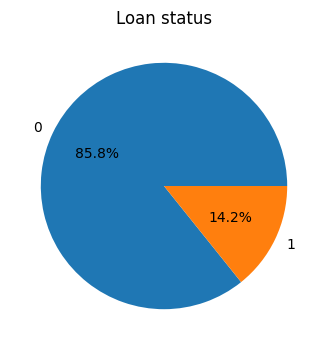

In [18]:
temp = raw_df['loan_status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.title('Loan status')
plt.show()

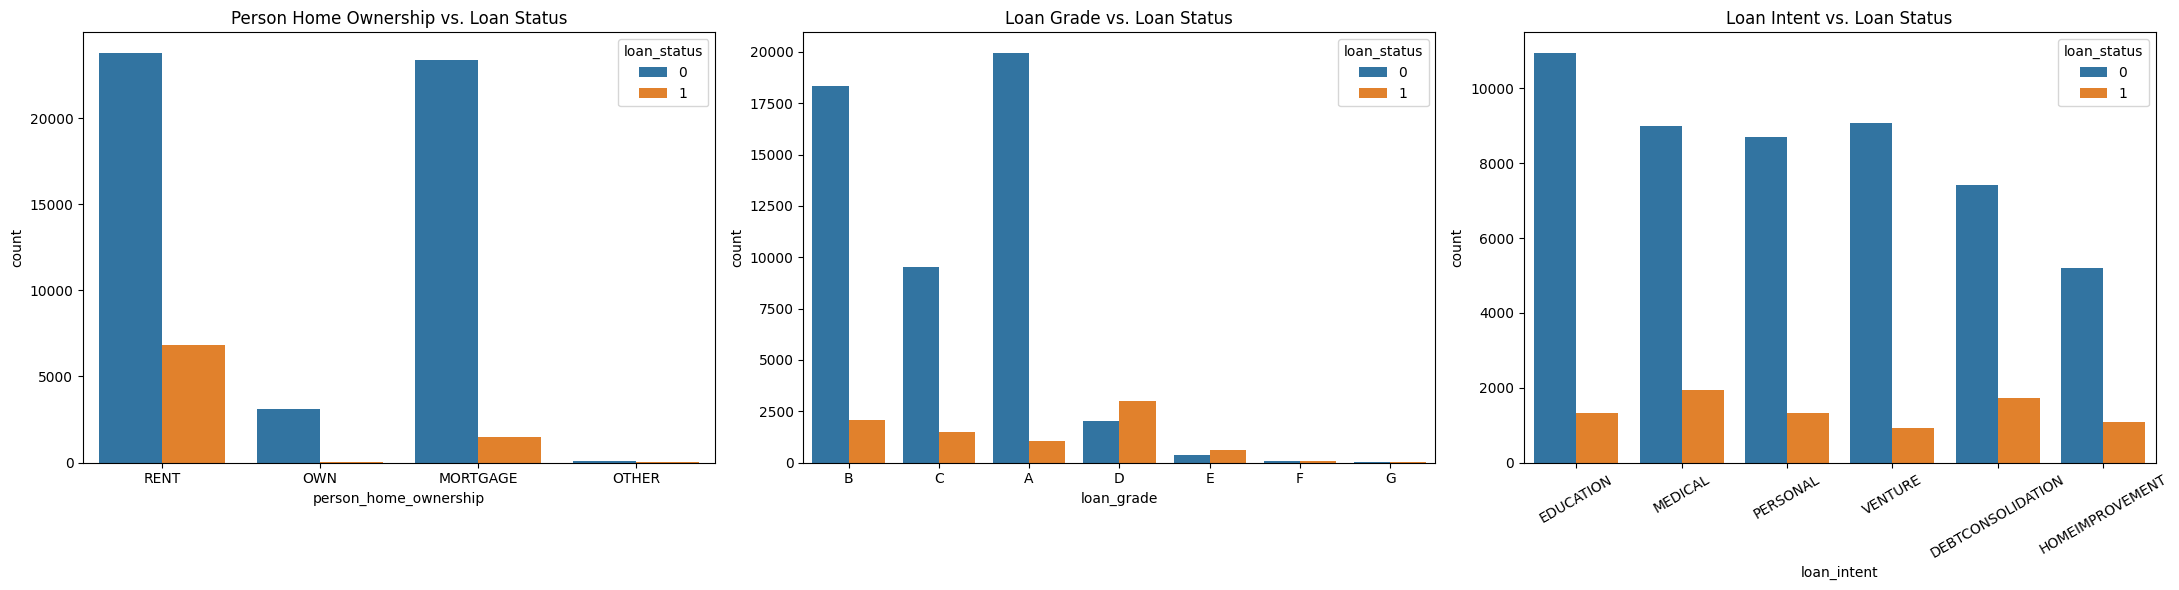

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))


sns.countplot(data=raw_df, x='person_home_ownership', hue='loan_status', ax=axes[0])
axes[0].set_title('Person Home Ownership vs. Loan Status')
sns.countplot(data=raw_df, x='loan_grade', hue='loan_status', ax=axes[1])
axes[1].set_title('Loan Grade vs. Loan Status')
sns.countplot(data=raw_df, x='loan_intent', hue='loan_status', ax=axes[2])
axes[2].set_title('Loan Intent vs. Loan Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

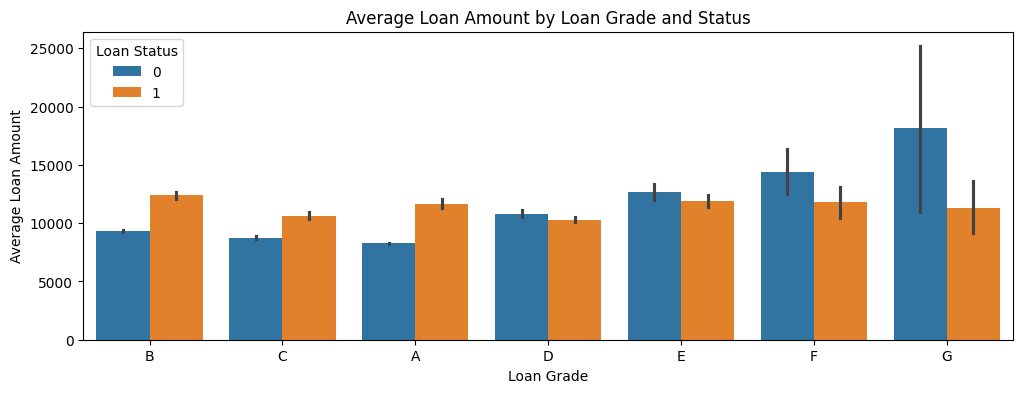

In [20]:
plt.figure(figsize=(12, 4))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=raw_df, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

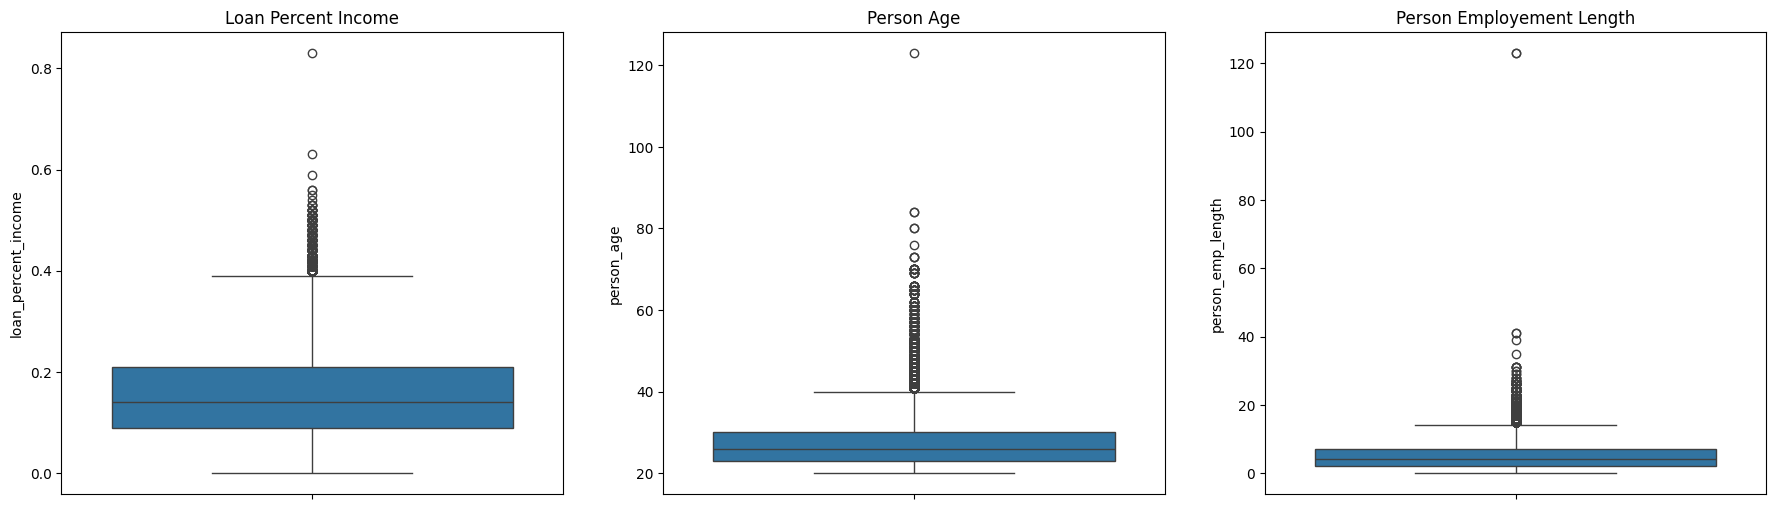

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))

sns.boxplot(data=raw_df['loan_percent_income'], ax=axes[0])
axes[0].set_title('Loan Percent Income')
sns.boxplot(data=raw_df['person_age'], ax=axes[1])
axes[1].set_title('Person Age')
sns.boxplot(data=raw_df['person_emp_length'], ax=axes[2])
axes[2].set_title('Person Employement Length')
plt.show()

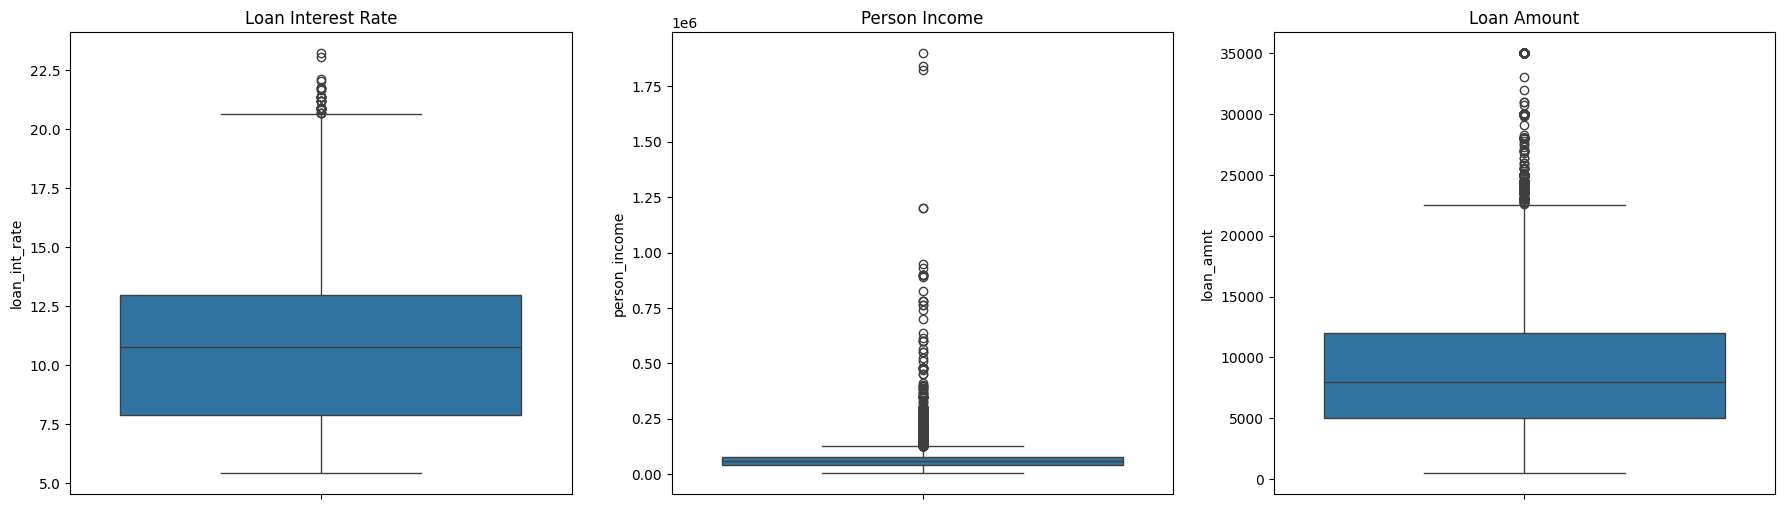

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))

sns.boxplot(data=raw_df['loan_int_rate'], ax=axes[0])
axes[0].set_title('Loan Interest Rate')
sns.boxplot(data=raw_df['person_income'], ax=axes[1])
axes[1].set_title('Person Income')
sns.boxplot(data=raw_df['loan_amnt'], ax=axes[2])
axes[2].set_title('Loan Amount')
plt.show()

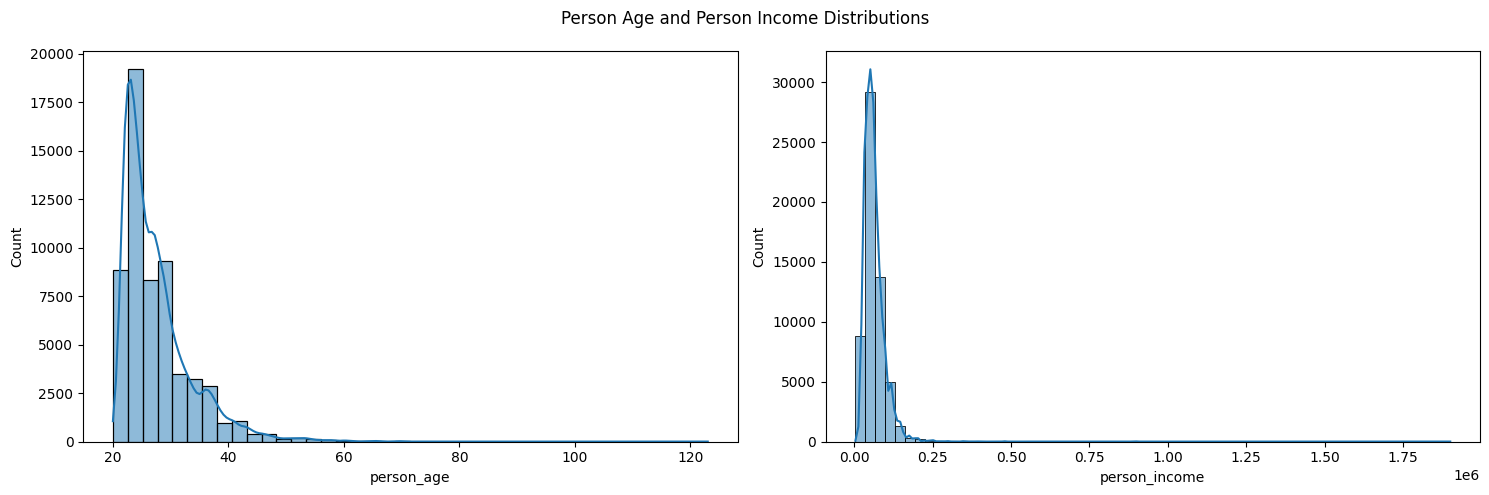

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Person Age and Person Income Distributions')

sns.histplot(raw_df['person_age'], kde=True, bins=40,ax=axes[0])
sns.histplot(raw_df['person_income'], kde=True, bins=60, ax=axes[1])
plt.tight_layout()
plt.show()

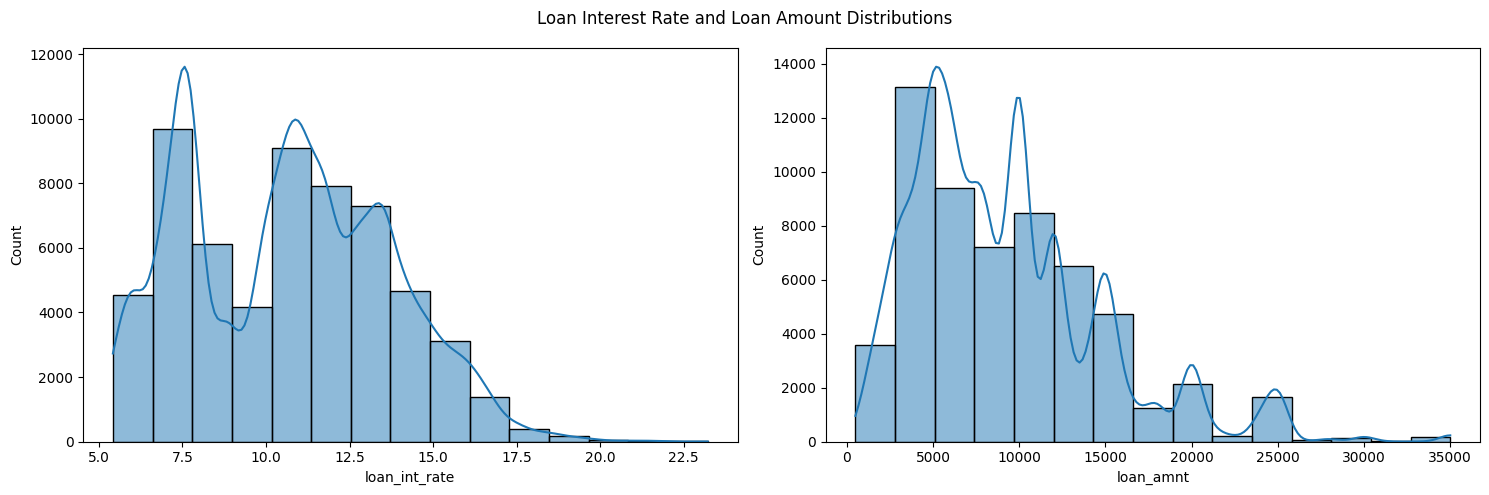

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Loan Interest Rate and Loan Amount Distributions')

sns.histplot(raw_df['loan_int_rate'], kde=True, bins=15,ax=axes[0])
sns.histplot(raw_df['loan_amnt'], kde=True,bins=15, ax=axes[1])
plt.tight_layout()
plt.show()

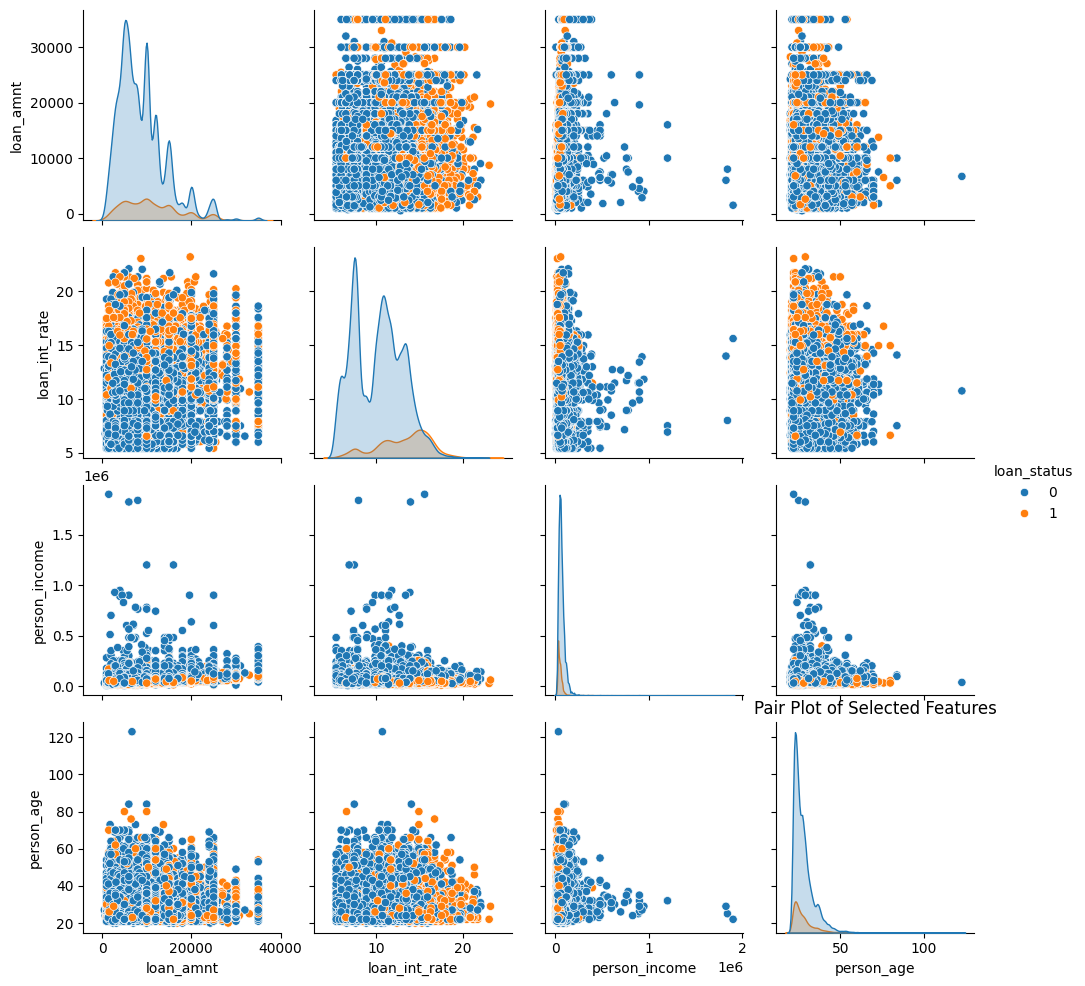

In [25]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(raw_df[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

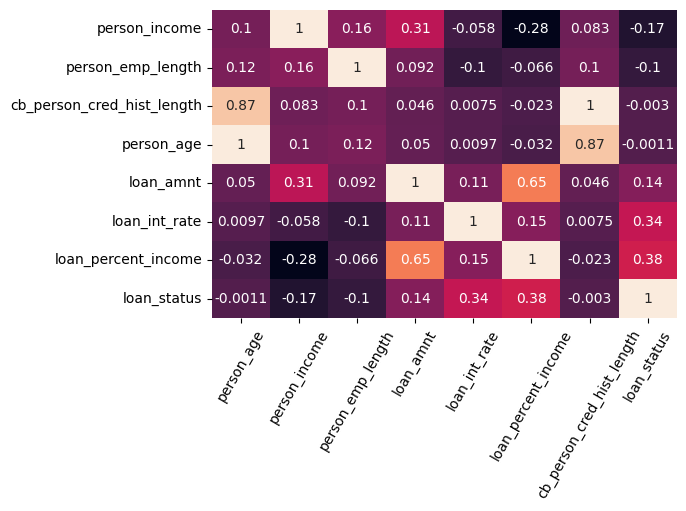

In [26]:
sns.heatmap( raw_df.corr(method='pearson', numeric_only=True).sort_values(by=['loan_status'],ascending=True), annot=True, cbar=False)
plt.xticks(rotation=60)
plt.show()

## Data Preprocessing

### Seperating Input and Target

In [27]:
raw_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [28]:
x=raw_df.iloc[:,:-1]
y=raw_df['loan_status']

In [29]:
categorizal_col=x.select_dtypes(include='object').columns.to_list()
numerical_col=x.select_dtypes(include=np.number).columns.to_list()

### Scaling Numerical Values

In [30]:
scaler = StandardScaler()
scaler.fit(raw_df[numerical_col])
x[numerical_col]= scaler.transform(x[numerical_col])

In [31]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,1.566200,-0.765768,RENT,-1.187200,EDUCATION,B,-0.578306,0.267616,0.117378,N,2.031798
1,-0.920057,-0.212128,OWN,0.328047,MEDICAL,C,-0.937775,0.880532,-0.973242,N,-0.946489
2,0.240196,-0.929223,OWN,0.833130,PERSONAL,A,-0.578306,-0.585854,0.553626,N,1.039036
3,0.405947,0.156966,RENT,2.348377,VENTURE,B,0.500101,0.142396,0.117378,N,-0.201917
4,-0.920057,-0.106673,RENT,-0.682117,MEDICAL,A,-0.578306,-1.238314,-0.646056,N,-0.698298


### Encoding Categorical Columns

In [32]:
encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(raw_df[categorizal_col])
encoded_col=list(encoder.get_feature_names_out(categorizal_col))
x[encoded_col]=encoder.transform(x[categorizal_col])

In [33]:
x.drop(columns=categorizal_col, inplace=True)

In [34]:
x.sample(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
57805,-0.754307,-0.106673,-0.682117,0.140632,0.089672,0.117378,-0.450108,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12303,-0.920057,-0.633949,-0.429576,-0.758041,-0.915379,-0.318870,-0.946489,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57179,1.400450,-0.502130,1.338212,0.356314,0.102853,0.989873,2.528179,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22744,-0.920057,-0.317688,0.580588,-0.578306,0.023767,-0.427932,-0.698298,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30979,-0.588556,0.684242,-0.177035,2.117712,0.102853,0.771749,-0.698298,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53300,-0.588556,0.684242,-0.682117,-0.308704,-0.585854,-0.864180,-0.450108,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44191,-0.091305,-0.423038,0.580588,-0.398572,-0.572673,-0.100746,1.039036,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47280,0.571697,-0.119854,-0.429576,1.039305,0.379654,0.989873,0.046274,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1024,-0.588556,-0.528494,0.833130,-0.128970,-1.732601,0.335502,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3546,-0.920057,-0.317583,0.580588,-0.758041,-0.964808,-0.646056,-0.698298,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Working on Model and Hyperparameter Tuning

### Model- RandomForest Vs XGBoost Classifier

In [35]:
#random_state=42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(x,y):
    train_df, test_df = x.iloc[train_idx], x.iloc[test_idx]
    train_target, test_target = y.iloc[train_idx], y.iloc[test_idx]


train_df, train_target = RandomUnderSampler(sampling_strategy='majority').fit_resample(train_df, train_target)

In [36]:
'''A modular code executed numerous times and several means/medians of data taken for further tuning the model'''

def model_comparison_evaluate(classifiers, train, target, test, t_target):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for score in scoring:
            scores = cross_val_score(model, train, target, scoring=score, cv=skfold, n_jobs=-1)
            v_scores = cross_val_score(model, test, t_target, scoring=score, cv=skfold, n_jobs=-1)
            print('Training: Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            print('Validation: Mean {} score: {:.3f} ({:.3f})'.format(score, v_scores.mean(), v_scores.std()))

        print('\n')

In [37]:
'''Logistic Regression, Random Forest and XGBoost Classifier comparison'''

classifiers = { 
                'Random Forest Classifier':RandomForestClassifier(criterion='gini',
                                                                  class_weight='balanced',
                                                                  random_state=seed, n_estimators=500,  n_jobs=-1,
                                                                  max_leaf_nodes=512, min_samples_split=2, min_samples_leaf=1,
                                                                  max_depth=15, bootstrap=True ),

                
                'XGBoost Classifier' : XGBClassifier(max_depth= 11, learning_rate= 0.08519184961043755,
                                                        n_estimators= 526, min_child_weight= 7,gamma= 0.8836107194006716, subsample = 0.9716472941489204,
                                                        colsample_bytree =0.43023334197969365, reg_alpha= 6.041292445595731,
                                                        reg_lambda= 3.0256296220488377,max_delta_step= 5,n_jobs=-1,
                                                        scale_pos_weight= 2.2304827035887316, random_state=seed)                                 
              }

model_comparison_evaluate(classifiers, train_df, train_target, test_df,test_target)

K-Fold Cross-Validation:

Random Forest Classifier:
Training: Mean accuracy score: 0.862 (0.007)
Validation: Mean accuracy score: 0.948 (0.003)
Training: Mean precision score: 0.921 (0.003)
Validation: Mean precision score: 0.912 (0.010)
Training: Mean recall score: 0.793 (0.017)
Validation: Mean recall score: 0.705 (0.013)
Training: Mean f1 score: 0.852 (0.009)
Validation: Mean f1 score: 0.795 (0.011)
Training: Mean roc_auc score: 0.932 (0.007)
Validation: Mean roc_auc score: 0.930 (0.008)


XGBoost Classifier:
Training: Mean accuracy score: 0.869 (0.006)
Validation: Mean accuracy score: 0.947 (0.004)
Training: Mean precision score: 0.847 (0.004)
Validation: Mean precision score: 0.860 (0.021)
Training: Mean recall score: 0.902 (0.011)
Validation: Mean recall score: 0.751 (0.014)
Training: Mean f1 score: 0.874 (0.007)
Validation: Mean f1 score: 0.802 (0.016)
Training: Mean roc_auc score: 0.952 (0.005)
Validation: Mean roc_auc score: 0.946 (0.006)




### Ploting and Studying Model

XGBClassifier:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      8560
           1       0.92      0.49      0.64      3169

    accuracy                           0.85     11729
   macro avg       0.88      0.73      0.77     11729
weighted avg       0.86      0.85      0.83     11729
 



Text(0.5, 0, 'False Positive Rate')

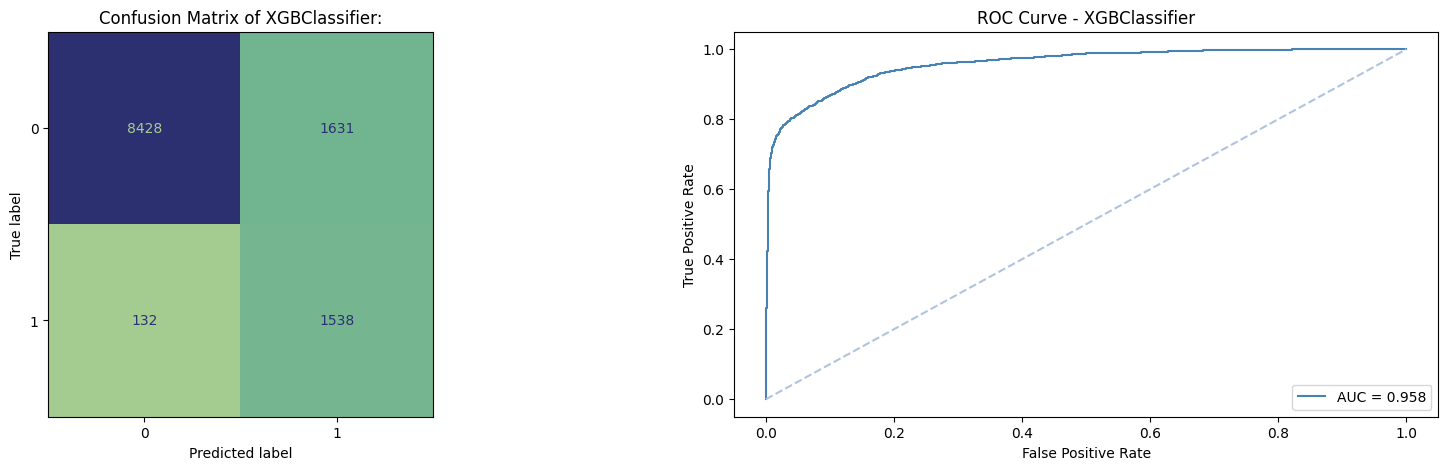

In [38]:
# Model
model = XGBClassifier(max_depth= 11, learning_rate= 0.08519184961043755,
                        n_estimators= 526, min_child_weight= 7,gamma= 0.8836107194006716, subsample = 0.9716472941489204,
                        colsample_bytree =0.43023334197969365, reg_alpha= 6.041292445595731,
                        reg_lambda= 3.0256296220488377,max_delta_step= 5,n_jobs=-1,
                        scale_pos_weight= 2.2304827035887316, random_state=seed)


model.fit(train_df, train_target) # Training
y_pred = model.predict(test_df) # Prediction
y_pred_score = model.predict_proba(test_df)[:,1] # Calculating Score
print('XGBClassifier:')
print(classification_report(y_pred, test_target), '\n')


# Plotting the graph and COnfusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of XGBClassifier:')
ConfusionMatrixDisplay.from_predictions(test_target, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(test_target, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - XGBClassifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

### Testing Model

In [39]:
'''A modular function to calculate the prediction on fresh Training and Predicting on Validation data'''
plt.rc('figure', figsize=(4,2))
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    #Prinitng the confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

#### Training Data

Accuracy: 91.80%


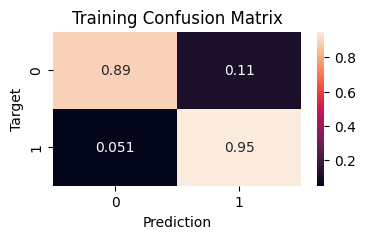

In [40]:
train_preds = predict_and_plot(train_df, train_target, 'Training')

Accuracy: 84.97%


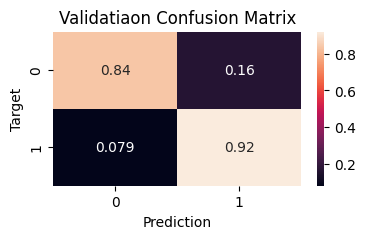

In [41]:
val_preds = predict_and_plot(test_df, test_target, 'Validatiaon')

#### Random Selection

In [42]:
x= pd.concat([train_df, test_df], axis=0)
y=pd.concat([train_target,test_target], axis=0)

In [43]:
x_train, y_train, x_target, y_target= train_test_split(x,y, test_size=0.35, shuffle=True)

Accuracy: 88.48%


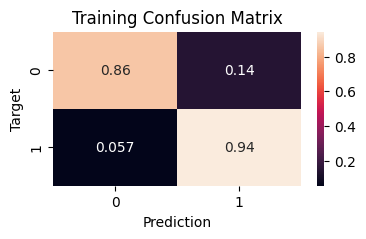

In [44]:
x_pred = predict_and_plot(x_train, x_target, 'Training')

Accuracy: 88.85%


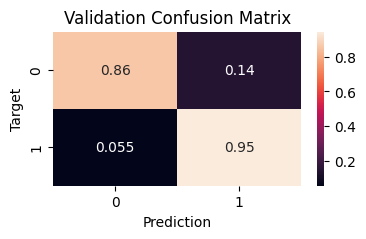

In [45]:
y_pred = predict_and_plot(y_train, y_target, 'Validation')

### Understaning Important Features From XGB CLassifier

In [46]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(7)

,feature,importance
20,loan_grade_D,0.261947
21,loan_grade_E,0.110159
10,person_home_ownership_RENT,0.077085
9,person_home_ownership_OWN,0.067552
17,loan_grade_A,0.061884
5,loan_percent_income,0.047172
7,person_home_ownership_MORTGAGE,0.044765


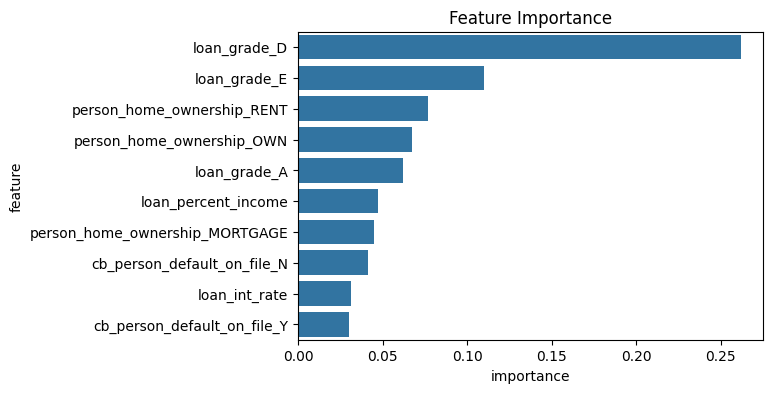

In [47]:
#plotting the Important Features
plt.rc('figure', figsize=(6,4))
plt.title('Feature Importance')
sns.barplot( x=importance_df['importance'].head(10), y=importance_df['feature'].head(10));

## Working on Test Data

### Data Preprocessing of Kaggle Test Set

In [48]:
kaggle_test_df= pd.read_csv('test.csv')
kaggle_test_df_copy= pd.read_csv('test.csv')
kaggle_test_df.drop(columns=['id'], inplace=True)

In [49]:
kaggle_test_df[numerical_col]= scaler.transform(kaggle_test_df[numerical_col])
kaggle_test_df[encoded_col]=encoder.transform(kaggle_test_df[categorizal_col])
kaggle_test_df.drop(columns=categorizal_col, inplace=True)

In [50]:
kaggle_test_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,-0.920057,-0.865950,-0.682117,-1.117510,-0.101452,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39094,-0.920057,-0.423038,0.328047,-0.398572,-1.531591,-0.100746,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39095,3.886707,-0.106673,-1.187200,1.039305,-1.043894,0.989873,4.761895,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39096,-0.920057,-0.739404,-0.177035,0.859570,1.628554,2.516741,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Model

#### Using and Preprocessing Old Data

In [51]:
x=raw_df.iloc[:,:-1]
y=raw_df['loan_status']

x.shape, y.shape

((58645, 11), (58645,))

In [52]:
x[numerical_col]= scaler.transform(x[numerical_col])
x[encoded_col]=encoder.transform(x[categorizal_col])
x.drop(columns=categorizal_col, inplace=True)

In [53]:
x.shape, y.shape

((58645, 26), (58645,))

In [54]:
x.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.091305,-0.502130,-0.682117,-0.039102,-0.572673,0.444564,-0.201917,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-0.422806,-0.502130,1.085671,0.500101,-1.363533,1.207997,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,-1.085808,-1.161225,-1.187200,-1.207377,0.926666,-0.318870,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.566200,0.146420,1.590753,-0.758041,1.371524,-0.973242,1.287227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,1.234699,1.211518,-1.187200,1.039305,0.758608,-0.209808,0.046274,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Training on complete data

XGBClassifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     10395
           1       0.84      0.90      0.87      1605

    accuracy                           0.96     12000
   macro avg       0.91      0.94      0.92     12000
weighted avg       0.96      0.96      0.96     12000
 



Text(0.5, 0, 'False Positive Rate')

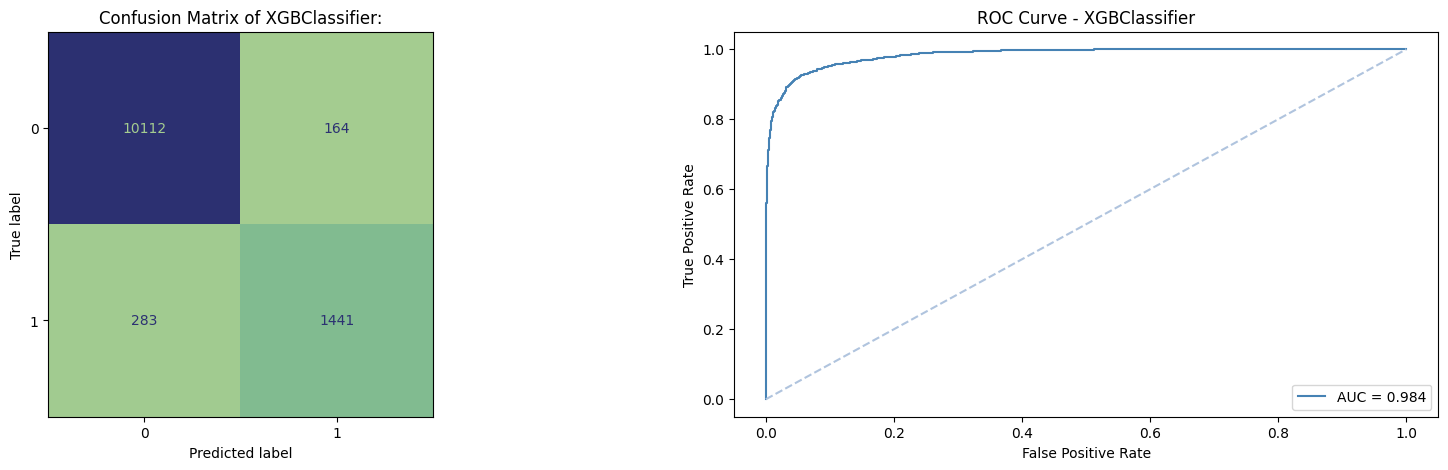

In [55]:
# Model
model = XGBClassifier(max_depth= 11, learning_rate= 0.08519184961043755,
                        n_estimators= 526, min_child_weight= 7,gamma= 0.8836107194006716, subsample = 0.9716472941489204,
                        colsample_bytree =0.43023334197969365, reg_alpha= 6.041292445595731,
                        reg_lambda= 3.0256296220488377,max_delta_step= 5,n_jobs=-1,
                        scale_pos_weight= 2.2304827035887316, random_state=seed)


model.fit(x, y) # Training
y_pred = model.predict(x.sample(12000, random_state=30)) # Prediction
y_pred_score = model.predict_proba(x.sample(12000, random_state=30))[:,1] # Calculating Score
print('XGBClassifier:')
print(classification_report(y_pred, y.sample(12000, random_state=30)), '\n')


# Plotting the graph and COnfusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of XGBClassifier:')
ConfusionMatrixDisplay.from_predictions(y.sample(12000, random_state=30), y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y.sample(12000, random_state=30), y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - XGBClassifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

### Testing Model

In [56]:
'''A modular function to calculate the prediction on fresh Training and Predicting on Validation data'''

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    #Prinitng the confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(4,2))
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

In [57]:
x_train, y_train, x_target, y_target= train_test_split(x,y, test_size=0.25, shuffle=True)

Accuracy: 96.23%


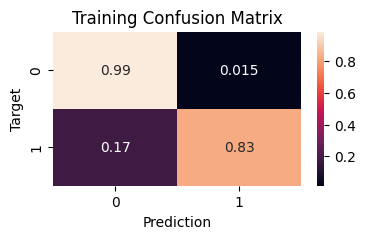

In [58]:
x_pred = predict_and_plot(x_train, x_target, 'Training')

Accuracy: 96.41%


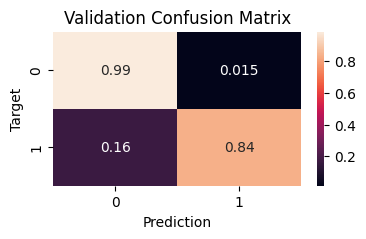

In [59]:
y_pred = predict_and_plot(y_train, y_target, 'Validation')

## Predicting on Kaggle Test

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store predictions and true labels
y_true = []
y_pred_proba = []
preds = []

# Step 4: Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(x, y):
    # Split data into training and validation sets
    X_train, X_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict probabilities for the validation set (class 1)
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    preds.append(model.predict_proba(kaggle_test_df)[:, 1])
    
    # Append true labels and predicted probabilities
    y_true.extend(y_val)
    y_pred_proba.extend(y_val_pred_proba)

# Step 5: Calculate the overall AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc}")

AUC-ROC Score: 0.9568017534867633


In [61]:
submission = pd.DataFrame({'id': kaggle_test_df_copy.id, 'loan_status': np.mean(preds, axis=0)})
#print(submission)
submission.to_csv('submission.csv', index=False)